# Importing the necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 

# Importing the dataset

In [2]:
dataset = pd.read_csv('C:\\Users\\Chandu\\Desktop\\Datasets\\Mall_Customers.csv')
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Preprocessing the Dataset

In [3]:
#Getting the basic information of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Dividing into input and output

In [4]:
#taking the last two(annual income and spending score)features as input

x = dataset.iloc[:,-2:].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Running a Cluster

SSE- sum of squared errors: The sum of squared differences between predicted data points (ŷi) and observed data points (yi). 


KMeans init: {'k-means++', 'random' or an ndarray}
    Method for initialization, defaults to 'k-means++':

    'k-means++’: selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. 

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.




In [5]:
#Checking how many clusters to be created

sse = []
for i in range(1,11):
    kmeans = KMeans (n_clusters =  i , init = 'k-means++')
    kmeans.fit(x)
    sse.append (kmeans.inertia_) #kmeans.inerita gives the sum of squared errors values
sse

C:\Users\Chandu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chandu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chandu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chandu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Wi

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.343617936585,
 25028.020475269415,
 21866.28125266371,
 19740.010370359305]

We can see that from clusters k = 5 the sse value is decreasing gradually...

Text(0, 0.5, 'SSE')

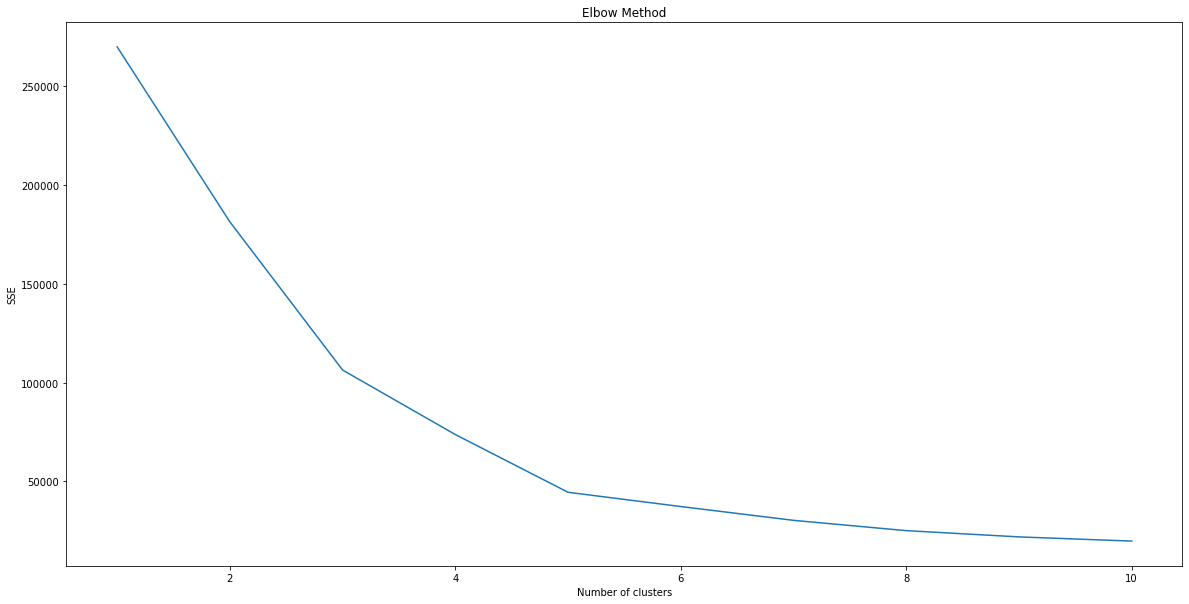

In [8]:
#Creating a Line Graph with SSE (Sum of distances) 

plt.figure(figsize=(20, 10))
plt.plot (range(1,11),sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel ('SSE')

Once K = 5(Identified by Elbow method), system randomly generates five Centroids and five clusters

In [9]:
#Creating the Model and making predictions

kmeans =  KMeans (n_clusters =  5 , init = 'k-means++')
kmeans = kmeans.fit(x)
y_kmeans = kmeans.predict(x)
y_kmeans

C:\Users\Chandu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [12]:
#let's view the centroid values

kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

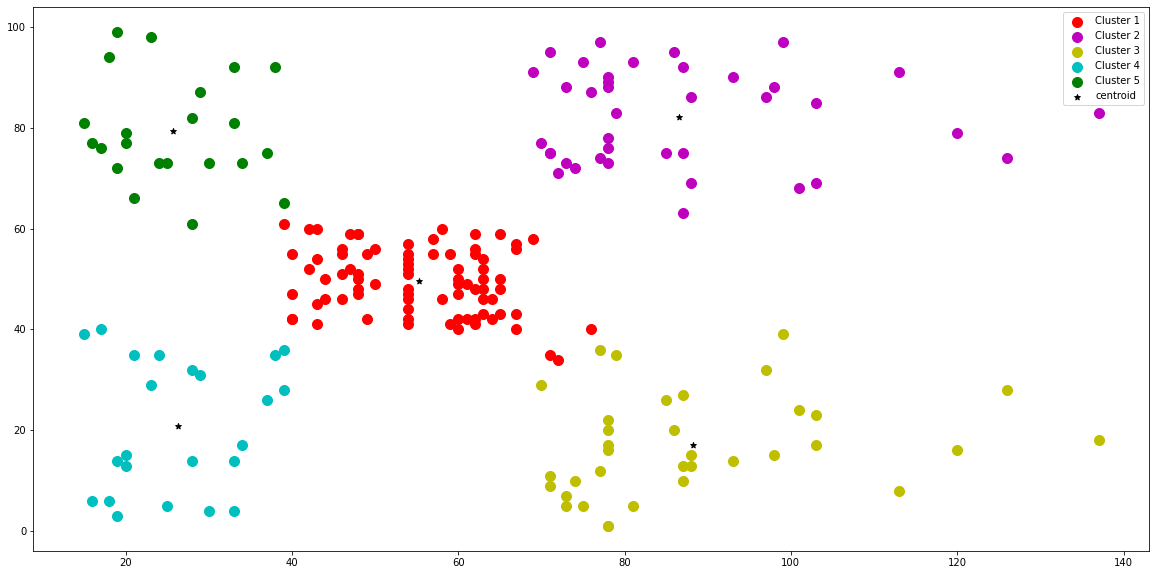

In [16]:
#let's create and view the clusters

plt.figure(figsize=(20, 10))
plt.scatter (x[y_kmeans == 0,0],x[y_kmeans == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y_kmeans == 1,0],x[y_kmeans == 1,1] ,s = 100, c='m', label = 'Cluster 2')
plt.scatter (x[y_kmeans == 2,0],x[y_kmeans == 2,1] ,s = 100, c='y', label = 'Cluster 3')
plt.scatter (x[y_kmeans == 3,0],x[y_kmeans == 3,1] ,s = 100, c='c', label = 'Cluster 4')
plt.scatter (x[y_kmeans == 4,0],x[y_kmeans == 4,1] ,s = 100, c='g', label = 'Cluster 5')

#lets view the centroid points also...
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black', marker = '*', label = 'centroid')

plt.legend()

In [20]:
#let's just try for clusters k = 7

kmeans =  KMeans (n_clusters =  7 , init = 'k-means++')
kmeans = kmeans.fit(x)
y_kmeans = kmeans.predict(x)
y_kmeans

C:\Users\Chandu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 2,
       0, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 6, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4])

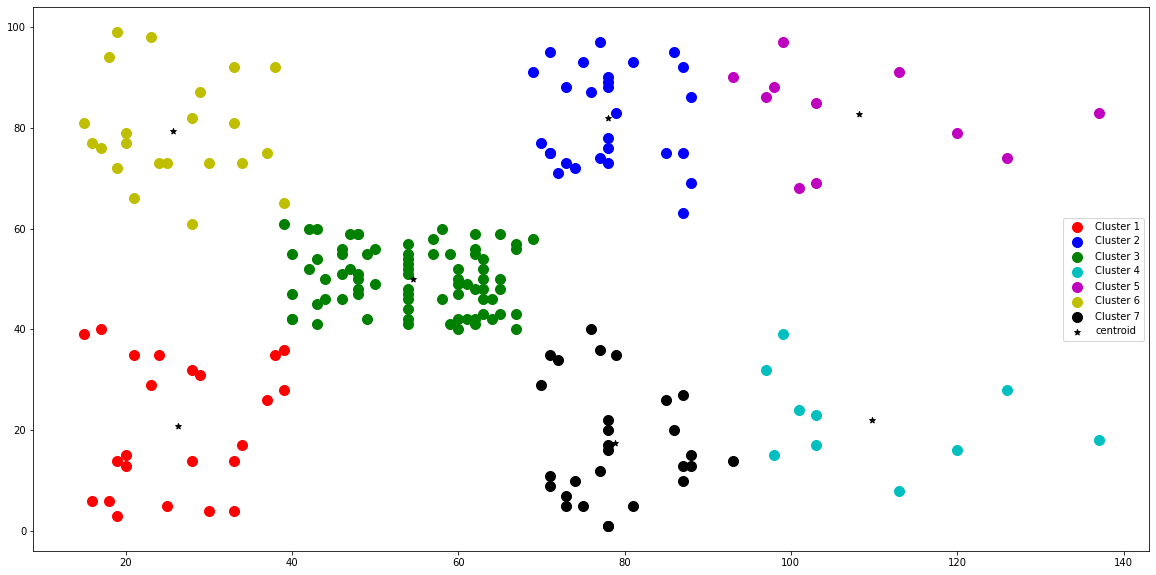

In [42]:
#let's create and view the clusters

plt.figure(figsize=(20, 10))
plt.scatter (x[y_kmeans == 0,0],x[y_kmeans == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y_kmeans == 1,0],x[y_kmeans == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.scatter (x[y_kmeans == 2,0],x[y_kmeans == 2,1] ,s = 100, c='g', label = 'Cluster 3')
plt.scatter (x[y_kmeans == 3,0],x[y_kmeans == 3,1] ,s = 100, c='c', label = 'Cluster 4')
plt.scatter (x[y_kmeans == 4,0],x[y_kmeans == 4,1] ,s = 100, c='m', label = 'Cluster 5')
plt.scatter (x[y_kmeans == 5,0],x[y_kmeans == 5,1] ,s = 100, c='y', label = 'Cluster 6')
plt.scatter (x[y_kmeans == 6,0],x[y_kmeans == 6,1] ,s = 100, c='k', label = 'Cluster 7')

#lets view the centroid points also...
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black', marker = '*', label = 'centroid')

plt.legend()
